In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split

C:\Users\DELL\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\DELL\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### K-Means - samples from Book

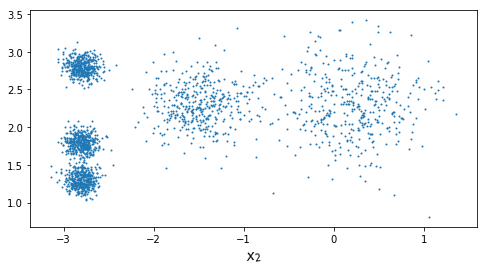

In [148]:
from sklearn.datasets import make_blobs
blob_centers = np.array([[0.2,2.3],
                        [-1.5,2.3],
                        [-2.8,1.8],
                        [-2.8,2.8],
                        [-2.8,1.3]])
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])

X,y = make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std)

def plot_clsters(X,y=None):
    plt.scatter(X[:,0],X[:,1],c=y,s=1)
    plt.xlabel("$x_1$",fontsize=14)
    plt.xlabel("$x_2$",fontsize=14,rotation=8)

plt.figure(figsize=(8,4))
plot_clsters(X)
plt.show()

In [133]:
k = 5
kmeans = KMeans(n_clusters=k,random_state=0)
y_pred = kmeans.fit_predict(X)

#y_pred == kmeans.labels
print(y_pred, y_pred.shape)
print(kmeans.labels_)

# holds the k centroids
print(kmeans.cluster_centers_)

# test the model
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])

# predict the labels of new instances - return the closet cluster for each instance - Hard Clustering
print('predict', kmeans.predict(X_new))

# transform  - return the measure distance of each instance to all k centroids - Soft Clustering
print('transform', kmeans.transform(X_new))

# we prefer min score
print(kmeans.score(X_new))


[1 2 4 ... 4 3 4] (2000,)
[1 2 4 ... 4 3 4]
[[-2.79500197  1.80407517]
 [ 0.24247962  2.32295043]
 [-1.48504302  2.29627728]
 [-2.79212125  2.80359969]
 [-2.79960414  1.29703418]]
predict [1 1 3 3]
transform [[2.80186055 0.40384817 1.51430942 2.90546271 2.88651075]
 [5.79831306 2.77636735 4.49481825 5.84760131 5.84205179]
 [1.21336738 3.31241154 1.67042519 0.28598366 1.71471603]
 [0.72548988 3.24730975 1.52859334 0.36794884 1.21954305]]
-8.088481990230656


In [134]:
def plot_decision_boundaries(clusterer,X,resolution=1000,show_centroids=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx,yy = np.meshgrid(np.linspace(mins[0],maxs[0],resolution),
                       np.linspace(mins[1],maxs[1],resolution))
    Z = clusterer.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z,extent=(mins[0],maxs[0],mins[1],maxs[1]),cmap='Pastel2')
    plt.contour(Z,extent=(mins[0],maxs[0],mins[1],maxs[1]),linewidths=1,colors='k')
    
    plt.scatter(X[:,0], X[:,1],marker='+',c=y, s=50)
    plt.scatter(clusterer.cluster_centers_[:,0], clusterer.cluster_centers_[:,1], marker='*', c='r', s=150)

    #plot_data(X)
    
#     if show_centroids:
#         plot_cntroids(clusterer.cluster_centers_)
    
    plt.xlabel("$x_1$",fontsize=14)
    plt.ylabel("$x_2$",fontsize=14,rotation=8)

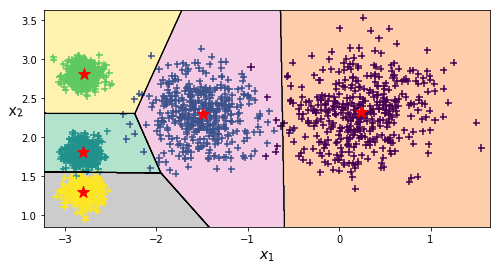

In [135]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans,X)
plt.show()

#### run kmeans alg. for 1,2,3 iteration to see the centroids move arround

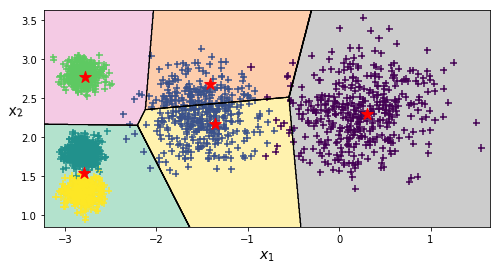

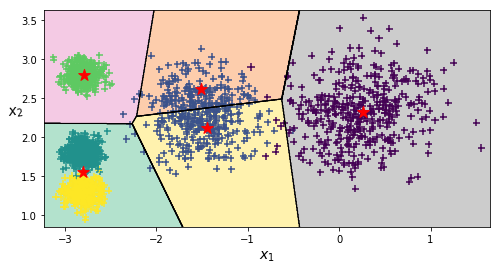

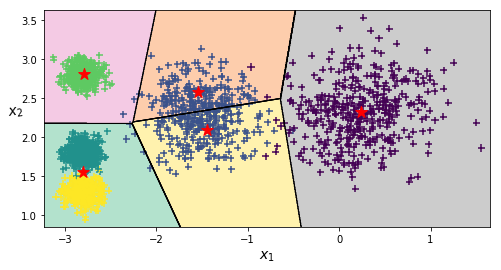

In [136]:
kmeans_iter1 = KMeans(n_clusters=5,init="random",n_init=1, algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5,init="random",n_init=1, algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5,init="random",n_init=1, algorithm="full", max_iter=3, random_state=0)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans_iter1,X)
plt.show()

plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans_iter2,X)
plt.show()

plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans_iter3,X)
plt.show()




#### Kmean variability



In [137]:
def plot_clusterer_comparison(clusterer1,clusterer2,X,title1=None,title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)
    
    plt.figure(figsize=(10,3.2))
    
    plt.subplot(121)
    plot_decision_boundaries(clusterer1,X)
    if title1:
        plt.title(title1,fontsize=14)
    
    plt.subplot(122)
    plot_decision_boundaries(clusterer2,X)
    if title2:
        plt.title(title2,fontsize=14)


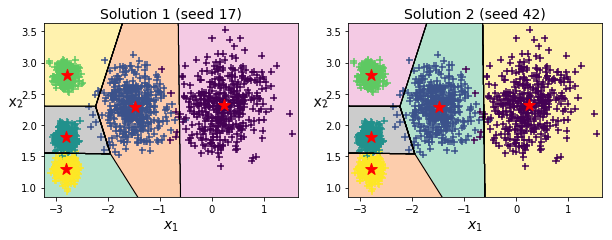

In [138]:
kmeans_rnd_init1 = KMeans(n_clusters=5,init="random",n_init=1,algorithm="full",random_state=17)
kmeans_rnd_init2 = KMeans(n_clusters=5,init="random",n_init=1,algorithm="full",random_state=42)

plot_clusterer_comparison(kmeans_rnd_init1,kmeans_rnd_init2,X,
                         "Solution 1 (seed 17)",
                         "Solution 2 (seed 42)")

### Inertia

In [139]:
print(kmeans.inertia_)
print('labels_',kmeans.labels_)
print('cluster_centers_',kmeans.cluster_centers_)


X_dist = kmeans.transform(X)
#print('X_dist',X_dist)

#len (X_dist)
comp_inertia = np.sum(X_dist[np.arange(len (X_dist)),kmeans.labels_] ** 2)
print(comp_inertia)

    

220.50833313546656
labels_ [1 2 4 ... 4 3 4]
cluster_centers_ [[-2.79500197  1.80407517]
 [ 0.24247962  2.32295043]
 [-1.48504302  2.29627728]
 [-2.79212125  2.80359969]
 [-2.79960414  1.29703418]]
220.50833313546676


### Mini Batch K-Means

220.73970845190402


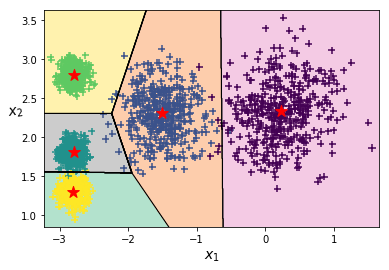

In [141]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5,random_state=0)
minibatch_kmeans.fit(X)
print(minibatch_kmeans.inertia_)
plot_decision_boundaries(minibatch_kmeans,X)

### Finding the optimal Number Of Clusters

644.3752301692568
134.5998753764262


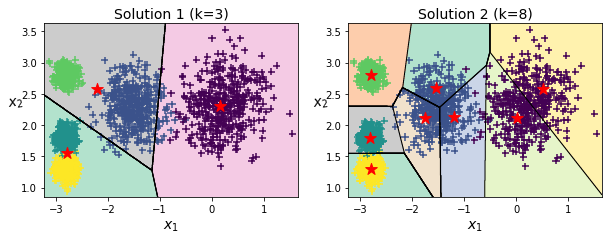

In [144]:
kmeans_K3 = KMeans(n_clusters=3,init="random",n_init=1,algorithm="full",random_state=0)
kmeans_k8 = KMeans(n_clusters=8,init="random",n_init=1,algorithm="full",random_state=0)

plot_clusterer_comparison(kmeans_K3,kmeans_k8,X,
                         "Solution 1 (k=3)",
                         "Solution 2 (k=8)")
print(kmeans_K3.inertia_)
print(kmeans_k8.inertia_)

[3558.350287771125, 1167.586620473797, 650.6610880221086, 272.7866771599855, 269.6905625602084, 219.0474969473716, 191.7136949407806, 149.7292535826631]


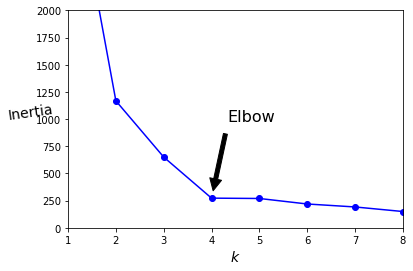

In [154]:
# plot the Elbow (inertia as a function of k)
inertias = []
k = 8
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,init="random",n_init=1,algorithm="full",random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
print(inertias)

plt.plot(range(1,9),inertias,"bo-")
plt.xlabel("$k$",fontsize=14)
plt.ylabel("Inertia",fontsize=14,rotation=8)
plt.annotate("Elbow",
            xy = (4,inertias[3]),
            xytext = (0.55,0.55),
            textcoords = "figure fraction",
            fontsize=16,
            arrowprops = dict(facecolor='black',shrink=0.1))
plt.axis([1,8,0,2000])
plt.show()

#### Ex page 394

In [ ]:


k = 3

centroids = np.array([[0,0],[16,0],[16,6]],dtype=float)
data = np.array([[0,0],[8,0],[8,6],[16,0],[0,6],[16,6],[5,5]])


plt.scatter(data[:,0], data[:,1],marker='+', s=50)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='g', s=150)

In [ ]:
#run k = 1

centroids_old = np.zeros(centroids.shape) # to store old centers
display('centroids_old',centroids_old)
centroids_new = centroids.copy() # Store new centers
display('centroids_new',centroids_new)

n = data.shape[0]
clusters = np.zeros(n)
distances = np.zeros((n,k))
inertia = np.zeros((k,1))

tolerance = 0.0001
prev_inertia, current_inertia = 0,1 

delta_inertia = current_inertia - prev_inertia #np.sqrt(((centroids_new - centroids_old)**2).sum(axis=1)) 


while delta_inertia > tolerance:

    display('data',data)
    for i in range(k):
        distances[:,i] = np.sqrt(((data - centroids[i])**2).sum(axis=1))
        print('distances k=',i,distances[:,i])

    clusters = np.argmin(distances, axis = 1)
    display('clusters argmin=',clusters)

    centroids_old = centroids_new.copy()

    for i in range(k):
        #print('data[clusters',clusters == i)
        #print(np.mean(data[clusters == i], axis=0))
        centroids_new[i] = np.mean(data[clusters == i], axis=0)

    display(centroids_new)
    
    
    for i in range(k):
        
        idx = np.where(clusters==i)
        print('idx',idx)
        #inertia[i] = np.sum(((data[idx] - centroids_new[i])**2).sum(axis=1))
        inertia[i] = ((data[idx] - centroids_new[i])**2).sum()
        print('inertia',inertia)

    prev_inertia = current_inertia
    current_inertia = inertia.sum()
    delta_inertia = current_inertia - prev_inertia
    print('current_inertia',current_inertia)

print('final delta_inertia',delta_inertia)

plt.scatter(data[:,0], data[:,1],marker='+', s=50)
plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='*', c='g', s=150)

#### Ex page 419 write KMeans Class

In [118]:
class MyKMeans(BaseEstimator):
    def __init__(self, n_clusters=3, n_init=10,max_iter=300, tol=0.0001,random_state=None ):

        self.n_clusters = n_clusters #n_samples should be >= n_clusters
        self.max_iter = max_iter #Number of iterations should be a positive number
        self.tol = tol
        self.n_init = n_init #must be bigger than zero
        self.random_state = random_state
     
    def fit(self, X, y=None, sample_weight=None):
            
        df = pd.DataFrame(X)
        k_samples = df.sample(self.n_clusters,random_state = self.random_state)
        centroids = np.array(k_samples) 
        
        plt.scatter(X[:,0], X[:,1],marker='+',c=y, s=50)
        plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='g', s=150)
        
        centroids_old = np.zeros(centroids.shape) # to store old centers
        self.centroids_new = centroids.copy() # Store new centers
        
        n = X.shape[0]
        self.clusters = np.zeros(n)
        distances = np.zeros((n,self.n_clusters))
        inertia = np.zeros((self.n_clusters,1))
        
        prev_inertia, current_inertia = 0,1 

        delta_inertia = np.abs(current_inertia - prev_inertia) 
        counter = 0
        
        while delta_inertia > self.tol:
    
            for i in range(self.n_clusters):
                distances[:,i] = np.sqrt(((X - self.centroids_new[i])**2).sum(axis=1))


            self.clusters = np.argmin(distances, axis = 1)
            #print('clusters',self.clusters)
            centroids_old = self.centroids_new.copy()

            for i in range(self.n_clusters):
                self.centroids_new[i] = np.mean(X[self.clusters == i], axis=0)


            for i in range(self.n_clusters):
                idx = np.where(self.clusters==i)
                inertia[i] = ((X[idx] - self.centroids_new[i])**2).sum()


            prev_inertia = current_inertia
            current_inertia = inertia.sum()
            delta_inertia = np.abs(current_inertia - prev_inertia)
            counter += 1
            print('current_inertia',current_inertia,'prev_inertia',prev_inertia)
   

        display(self.centroids_new)
        print('final delta_inertia',delta_inertia,'counter',counter)

        plt.scatter(X[:,0], X[:,1],marker='+',c=y, s=50)
        plt.scatter(self.centroids_new[:,0], self.centroids_new[:,1], marker='*', c='r', s=150)

    def predict(self,X):
        n = X.shape[0]
        print(n)
        distances = np.zeros((n,self.n_clusters))
        for i in range(self.n_clusters):
            distances[:,i] = np.sqrt(((X - self.centroids_new[i])**2).sum(axis=1))

        predict_clusters = np.argmin(distances, axis = 1)
        return predict_clusters
        


#### run MyKMeans with Iris DS

(120, 2)
current_inertia 47.38972481203008 prev_inertia 1
current_inertia 41.46228465515559 prev_inertia 47.38972481203008
current_inertia 38.84296230300151 prev_inertia 41.46228465515559
current_inertia 35.14283198205968 prev_inertia 38.84296230300151
current_inertia 31.046241356492974 prev_inertia 35.14283198205968
current_inertia 29.827770460358057 prev_inertia 31.046241356492974
current_inertia 29.329008145363403 prev_inertia 29.827770460358057
current_inertia 28.888117104440276 prev_inertia 29.329008145363403
current_inertia 28.71069343180389 prev_inertia 28.888117104440276
current_inertia 28.686785353535353 prev_inertia 28.71069343180389
current_inertia 28.686785353535353 prev_inertia 28.686785353535353


array([[6.87777778, 3.09722222],
       [4.9775    , 3.415     ],
       [5.76136364, 2.69772727]])

final delta_inertia 0.0 counter 11
(30, 2)
30


array([0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 2, 0], dtype=int64)

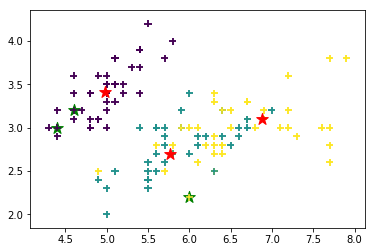

In [128]:
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model = MyKMeans(n_clusters=3,random_state=17)
print(X_train.shape)
model.fit(X_train,y_train)
print(X_test.shape)
model.predict(X_test)





In [129]:
#compare MyKmeans with scikit KMeans - comapre the Inertia
k = 3
kmeans = KMeans(n_clusters=k,random_state=17)
y_pred = kmeans.fit_predict(X_train)

#y_pred == kmeans.labels
print(y_pred, y_pred.shape)
print(kmeans.labels_)

# holds the k centroids
print(kmeans.cluster_centers_)

print(kmeans.inertia_)

[2 1 2 0 1 2 0 1 1 0 2 1 2 2 2 1 0 0 1 2 1 2 1 1 1 0 2 2 0 1 1 0 0 0 2 1 0
 0 2 0 2 1 0 2 2 0 2 1 1 0 0 0 0 2 1 2 1 1 0 2 1 0 0 0 2 0 2 1 0 0 1 2 0 2
 2 1 0 0 2 2 0 1 0 1 0 2 1 1 0 1 2 2 2 1 1 1 2 1 0 2 2 0 2 1 2 0 2 2 2 0 2
 2 0 1 1 2 2 0 0 2] (120,)
[2 1 2 0 1 2 0 1 1 0 2 1 2 2 2 1 0 0 1 2 1 2 1 1 1 0 2 2 0 1 1 0 0 0 2 1 0
 0 2 0 2 1 0 2 2 0 2 1 1 0 0 0 0 2 1 2 1 1 0 2 1 0 0 0 2 0 2 1 0 0 1 2 0 2
 2 1 0 0 2 2 0 1 0 1 0 2 1 1 0 1 2 2 2 1 1 1 2 1 0 2 2 0 2 1 2 0 2 2 2 0 2
 2 0 1 1 2 2 0 0 2]
[[4.9775     3.415     ]
 [6.87777778 3.09722222]
 [5.76136364 2.69772727]]
28.686785353535353


In [ ]:
def plot_decision_boundaries(clusterer,X,resolution=1000,show_centroids=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx,yy = np.meshgrid(np.linspace(mins[0],maxs[0],resolution),
                       np.linspace(mins[1],maxs[1],resolution))
    Z = clusterer.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z,extent=(mins[0],maxs[0],mins[1],maxs[1]),cmap=plt.cm.Spectral)
    plt.contour(Z,extent=(mins[0],maxs[0],mins[1],maxs[1]),linewidths=1,colors='k')
    
    plt.scatter(X[:,0], X[:,1],marker='+',c=y, s=50)
    plt.scatter(clusterer.centroids_new[:,0], clusterer.centroids_new[:,1], marker='*', c='r', s=150)

    #plot_data(X)
    
#     if show_centroids:
#         plot_cntroids(clusterer.cluster_centers_)
    
    plt.xlabel("$x_1$",fontsize=14)
    plt.xlabel("$x_2$",fontsize=14,rotation=8)
        

In [ ]:
model = MyKMeans()
model.fit(X_train,y_train)

plt.figure(figsize=(8,4))
plot_decision_boundaries(model,X)
plt.show()

####  run k-means with Iris DS before write the class
the first centroids influence the results 
ניסיון להריץ עם מרכזים התחלתיים שונים

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

xmin1 = X[0].min()
xmin2 = X[1].min()
#print(xmin1,xmin2)

xmax1 = X[0].max()
xmax2 = X[1].max()
#print(xmax1,xmax2)

#xmean1 = X[0].mean()
#xmean2 = X[1].mean()
#print('mean',xmean1,xmean2)

#xstd1 = X[0].std()
#xstd2 = X[1].std()
#print('std',xstd1,xstd2)

#x_1 = np.random.uniform(low=xmin1, high=xmax1,size=3)
#x_2 = np.random.uniform(low=xmin2, high=xmax2,size=3)

k = 3

df = pd.DataFrame(X)
centers = df.sample(k)
# print('sample')
# print(centers)
# print('************************')
# print(centers.iloc[0][0],centers.iloc[0][1])


#np.random.randint(low=1, high=100, size=4)
#np.random.randint(low=1, high=100, size=4)

#centroids = np.array([[xmin1,xmin2], [xmean1,xmean2] ,[xmax1,xmax2]]) 
centroids = np.array(centers) #np.array([[centers.iloc[0][0],centers.iloc[0][1]], [centers.iloc[1][0],centers.iloc[1][1]] ,[centers.iloc[2][0],centers.iloc[2][1]]]) 
print(centroids)

plt.scatter(X[:,0], X[:,1],marker='+',c=y, s=50)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='g', s=150)

centroids_old = np.zeros(centroids.shape) # to store old centers
#display('centroids_old',centroids_old)
centroids_new = centroids.copy() # Store new centers
#display('centroids_new',centroids_new)

n = X.shape[0]
clusters = np.zeros(n)
distances = np.zeros((n,k))
inertia = np.zeros((k,1))
tolerance = 0.0001
prev_inertia, current_inertia = 0,1 

delta_inertia = np.abs(current_inertia - prev_inertia) #np.sqrt(((centroids_new - centroids_old)**2).sum(axis=1)) 
counter = 0
while delta_inertia > tolerance:
    print('counter', counter,'delta_inertia',delta_inertia)
    for i in range(k):
        distances[:,i] = np.sqrt(((X - centroids_new[i])**2).sum(axis=1))
        
    clusters = np.argmin(distances, axis = 1)

    centroids_old = centroids_new.copy()

    for i in range(k):
        centroids_new[i] = np.mean(X[clusters == i], axis=0)
        
    for i in range(k):
        
        idx = np.where(clusters==i)
        inertia[i] = np.sum(((X[idx] - centroids_new[i])**2).sum(axis=1))

    prev_inertia = current_inertia
    current_inertia = inertia.sum()
    delta_inertia = np.abs(current_inertia - prev_inertia)
    counter += 1
    print('current_inertia',current_inertia,'prev_inertia',prev_inertia)
   

display(centroids_new)
print('final delta_inertia',delta_inertia,'counter',counter)

plt.scatter(X[:,0], X[:,1],marker='+',c=y, s=50)
plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='*', c='g', s=150)
